<a href="https://colab.research.google.com/github/ikechiamaka/WeatherPredictionLSTM_RNN/blob/main/Raw_WeatherData_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('weatherdata.csv', index_col = 'dt_iso')
df

,dt,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,temp_min,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
dt_iso,,,,,,,,,,,,,,,,,,,,,
1983-01-01 00:00:00 +0000 UTC,410227200,-18000,Ottawa,45.42153,-75.697193,-2.87,NaN,-6.25,-6.78,-3.29,...,NaN,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04n
1983-01-01 01:00:00 +0000 UTC,410230800,-18000,Ottawa,45.42153,-75.697193,-2.95,NaN,-6.32,-6.86,-3.39,...,NaN,NaN,NaN,NaN,NaN,99,804,Clouds,overcast clouds,04n
1983-01-01 02:00:00 +0000 UTC,410234400,-18000,Ottawa,45.42153,-75.697193,-2.83,NaN,-5.75,-6.68,-3.27,...,NaN,NaN,NaN,NaN,NaN,99,804,Clouds,overcast clouds,04n
1983-01-01 03:00:00 +0000 UTC,410238000,-18000,Ottawa,45.42153,-75.697193,-2.84,NaN,-5.47,-6.82,-3.29,...,NaN,NaN,NaN,NaN,NaN,97,804,Clouds,overcast clouds,04n
1983-01-01 04:00:00 +0000 UTC,410241600,-18000,Ottawa,45.42153,-75.697193,-2.97,NaN,-5.31,-7.19,-3.41,...,NaN,NaN,NaN,NaN,NaN,76,803,Clouds,broken clouds,04n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-18 19:00:00 +0000 UTC,1676746800,-18000,Ottawa,45.42153,-75.697193,-1.29,10000.0,-6.37,-6.61,-2.33,...,NaN,NaN,NaN,NaN,1.00,100,600,Snow,light snow,13d
2023-02-18 20:00:00 +0000 UTC,1676750400,-18000,Ottawa,45.42153,-75.697193,-0.65,10000.0,-5.76,-6.10,-1.57,...,8.75,NaN,NaN,NaN,0.13,100,600,Snow,light snow,13d
2023-02-18 21:00:00 +0000 UTC,1676754000,-18000,Ottawa,45.42153,-75.697193,-0.67,10000.0,-5.08,-6.63,-1.22,...,NaN,NaN,NaN,NaN,0.13,100,600,Snow,light snow,13d


In [ ]:
df.apply(pd.isnull).sum()

dt                          0
timezone                    0
city_name                   0
lat                         0
lon                         0
temp                        0
visibility              23305
dew_point                   0
feels_like                  0
temp_min                    0
temp_max                    0
pressure                    0
sea_level              372004
grnd_level             372004
humidity                    0
wind_speed                  0
wind_deg                    0
wind_gust              317978
rain_1h                326022
rain_3h                371770
snow_1h                350327
snow_3h                371854
clouds_all                  0
weather_id                  0
weather_main                0
weather_description         0
weather_icon                0
dtype: int64

In [ ]:
null_pct = df.apply(pd.isnull).sum()/df.shape[0]
null_pct

dt                     0.000000
timezone               0.000000
city_name              0.000000
lat                    0.000000
lon                    0.000000
temp                   0.000000
visibility             0.062647
dew_point              0.000000
feels_like             0.000000
temp_min               0.000000
temp_max               0.000000
pressure               0.000000
sea_level              1.000000
grnd_level             1.000000
humidity               0.000000
wind_speed             0.000000
wind_deg               0.000000
wind_gust              0.854770
rain_1h                0.876394
rain_3h                0.999371
snow_1h                0.941729
snow_3h                0.999597
clouds_all             0.000000
weather_id             0.000000
weather_main           0.000000
weather_description    0.000000
weather_icon           0.000000
dtype: float64

In [ ]:
valid_columns = df.columns[null_pct<.05]
valid_columns

Index(['dt', 'timezone', 'city_name', 'lat', 'lon', 'temp', 'dew_point',
       'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity',
       'wind_speed', 'wind_deg', 'clouds_all', 'weather_id', 'weather_main',
       'weather_description', 'weather_icon'],
      dtype='object')

In [ ]:
df = df[valid_columns].copy()
df

,dt,timezone,city_name,lat,lon,temp,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_id,weather_main,weather_description,weather_icon
dt_iso,,,,,,,,,,,,,,,,,,,
1983-01-01 00:00:00 +0000 UTC,410227200,-18000,Ottawa,45.42153,-75.697193,-2.87,-6.25,-6.78,-3.29,-2.50,1021,75,2.83,185,100,804,Clouds,overcast clouds,04n
1983-01-01 01:00:00 +0000 UTC,410230800,-18000,Ottawa,45.42153,-75.697193,-2.95,-6.32,-6.86,-3.39,-2.57,1021,75,2.82,192,99,804,Clouds,overcast clouds,04n
1983-01-01 02:00:00 +0000 UTC,410234400,-18000,Ottawa,45.42153,-75.697193,-2.83,-5.75,-6.68,-3.27,-2.44,1020,78,2.78,205,99,804,Clouds,overcast clouds,04n
1983-01-01 03:00:00 +0000 UTC,410238000,-18000,Ottawa,45.42153,-75.697193,-2.84,-5.47,-6.82,-3.29,-2.43,1019,80,2.91,214,97,804,Clouds,overcast clouds,04n
1983-01-01 04:00:00 +0000 UTC,410241600,-18000,Ottawa,45.42153,-75.697193,-2.97,-5.31,-7.19,-3.41,-2.58,1019,82,3.13,221,76,803,Clouds,broken clouds,04n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-18 19:00:00 +0000 UTC,1676746800,-18000,Ottawa,45.42153,-75.697193,-1.29,-6.37,-6.61,-2.33,-0.16,1018,65,5.14,210,100,600,Snow,light snow,13d
2023-02-18 20:00:00 +0000 UTC,1676750400,-18000,Ottawa,45.42153,-75.697193,-0.65,-5.76,-6.10,-1.57,0.02,1018,65,5.66,230,100,600,Snow,light snow,13d
2023-02-18 21:00:00 +0000 UTC,1676754000,-18000,Ottawa,45.42153,-75.697193,-0.67,-5.08,-6.63,-1.22,-0.04,1019,69,6.69,240,100,600,Snow,light snow,13d


In [ ]:
df.apply(pd.isnull).sum()

dt                     0
timezone               0
city_name              0
lat                    0
lon                    0
temp                   0
dew_point              0
feels_like             0
temp_min               0
temp_max               0
pressure               0
humidity               0
wind_speed             0
wind_deg               0
clouds_all             0
weather_id             0
weather_main           0
weather_description    0
weather_icon           0
dtype: int64

In [ ]:
df.dtypes

dt                       int64
timezone                 int64
city_name               object
lat                    float64
lon                    float64
temp                   float64
dew_point              float64
feels_like             float64
temp_min               float64
temp_max               float64
pressure                 int64
humidity                 int64
wind_speed             float64
wind_deg                 int64
clouds_all               int64
weather_id               int64
weather_main            object
weather_description     object
weather_icon            object
dtype: object

In [ ]:
df.index

Index(['1983-01-01 00:00:00 +0000 UTC', '1983-01-01 01:00:00 +0000 UTC',
       '1983-01-01 02:00:00 +0000 UTC', '1983-01-01 03:00:00 +0000 UTC',
       '1983-01-01 04:00:00 +0000 UTC', '1983-01-01 05:00:00 +0000 UTC',
       '1983-01-01 06:00:00 +0000 UTC', '1983-01-01 07:00:00 +0000 UTC',
       '1983-01-01 08:00:00 +0000 UTC', '1983-01-01 09:00:00 +0000 UTC',
       ...
       '2023-02-18 14:00:00 +0000 UTC', '2023-02-18 15:00:00 +0000 UTC',
       '2023-02-18 16:00:00 +0000 UTC', '2023-02-18 17:00:00 +0000 UTC',
       '2023-02-18 18:00:00 +0000 UTC', '2023-02-18 19:00:00 +0000 UTC',
       '2023-02-18 20:00:00 +0000 UTC', '2023-02-18 21:00:00 +0000 UTC',
       '2023-02-18 22:00:00 +0000 UTC', '2023-02-18 23:00:00 +0000 UTC'],
      dtype='object', name='dt_iso', length=372004)

In [ ]:
from dateutil import parser
import pandas as pd
df.index = df.index.str.replace(' UTC', '')
# Parse the index column using dateutil.parser.parse()
df.index = df.index.map(lambda x: parser.parse(x))

# Verify that the index is now a DatetimeIndex
print(df.index)


DatetimeIndex(['1983-01-01 00:00:00+00:00', '1983-01-01 01:00:00+00:00',
               '1983-01-01 02:00:00+00:00', '1983-01-01 03:00:00+00:00',
               '1983-01-01 04:00:00+00:00', '1983-01-01 05:00:00+00:00',
               '1983-01-01 06:00:00+00:00', '1983-01-01 07:00:00+00:00',
               '1983-01-01 08:00:00+00:00', '1983-01-01 09:00:00+00:00',
               ...
               '2023-02-18 14:00:00+00:00', '2023-02-18 15:00:00+00:00',
               '2023-02-18 16:00:00+00:00', '2023-02-18 17:00:00+00:00',
               '2023-02-18 18:00:00+00:00', '2023-02-18 19:00:00+00:00',
               '2023-02-18 20:00:00+00:00', '2023-02-18 21:00:00+00:00',
               '2023-02-18 22:00:00+00:00', '2023-02-18 23:00:00+00:00'],
              dtype='datetime64[ns, tzlocal()]', name='dt_iso', length=372004, freq=None)


In [ ]:
df.index = pd.to_datetime(df.index, format='%d-%m-%Y %H:%M:%S')
df[:26]

,dt,timezone,city_name,lat,lon,temp,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_id,weather_main,weather_description,weather_icon
dt_iso,,,,,,,,,,,,,,,,,,,
1983-01-01 00:00:00+00:00,410227200,-18000,Ottawa,45.42153,-75.697193,-2.87,-6.25,-6.78,-3.29,-2.50,1021,75,2.83,185,100,804,Clouds,overcast clouds,04n
1983-01-01 01:00:00+00:00,410230800,-18000,Ottawa,45.42153,-75.697193,-2.95,-6.32,-6.86,-3.39,-2.57,1021,75,2.82,192,99,804,Clouds,overcast clouds,04n
1983-01-01 02:00:00+00:00,410234400,-18000,Ottawa,45.42153,-75.697193,-2.83,-5.75,-6.68,-3.27,-2.44,1020,78,2.78,205,99,804,Clouds,overcast clouds,04n
1983-01-01 03:00:00+00:00,410238000,-18000,Ottawa,45.42153,-75.697193,-2.84,-5.47,-6.82,-3.29,-2.43,1019,80,2.91,214,97,804,Clouds,overcast clouds,04n
1983-01-01 04:00:00+00:00,410241600,-18000,Ottawa,45.42153,-75.697193,-2.97,-5.31,-7.19,-3.41,-2.58,1019,82,3.13,221,76,803,Clouds,broken clouds,04n
1983-01-01 05:00:00+00:00,410245200,-18000,Ottawa,45.42153,-75.697193,-2.95,-5.15,-7.34,-3.51,-2.42,1018,83,3.32,223,45,802,Clouds,scattered clouds,03n
1983-01-01 06:00:00+00:00,410248800,-18000,Ottawa,45.42153,-75.697193,-2.96,-5.16,-7.55,-3.55,-2.42,1018,83,3.54,226,8,800,Clear,sky is clear,01n
1983-01-01 07:00:00+00:00,410252400,-18000,Ottawa,45.42153,-75.697193,-3.07,-5.40,-7.70,-3.69,-2.51,1018,82,3.56,226,1,800,Clear,sky is clear,01n
1983-01-01 08:00:00+00:00,410256000,-18000,Ottawa,45.42153,-75.697193,-3.02,-5.36,-7.65,-3.64,-2.46,1017,82,3.57,225,0,800,Clear,sky is clear,01n


In [ ]:
df.to_csv('cleaned_weather_data.csv', index=True)

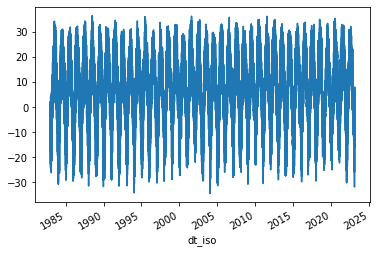

In [ ]:
temp = df['temp']
temp.plot()